# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Loading the saved dataset

In [2]:
# Load the CSV file into a DataFrame
data1 = pd.read_csv("colchester_exploration_preprocessed_data.csv")
print(data1)

                   datetime  temp  humidity  solarenergy  hour  day_of_week  \
0       2000-01-01 00:00:00   5.9     98.63     0.439357     0            5   
1       2000-01-01 01:00:00   6.4     96.12     0.439357     1            5   
2       2000-01-01 02:00:00   6.6     98.31     0.439357     2            5   
3       2000-01-01 03:00:00   7.2     95.92     0.439357     3            5   
4       2000-01-01 04:00:00   7.2     96.38     0.439357     4            5   
...                     ...   ...       ...          ...   ...          ...   
188019  2024-01-05 05:00:00   5.2     92.17     0.000000     5            4   
188020  2024-01-05 06:00:00   5.2     92.40     0.000000     6            4   
188021  2024-01-05 07:00:00   5.5     89.64     0.000000     7            4   
188022  2024-01-05 08:00:00   5.8     88.93     0.000000     8            4   
188023  2024-01-05 09:00:00   6.0     88.83     0.000000     9            4   

        month  energy_surplus_next_day  energy_surp

In [3]:
# # defining the Data for input features and target variables
X = data1.drop([ 'datetime','hour', 'day_of_week', 'month', 'energy_surplus_next_day', 'energy_surplus'], axis=1)
y = data1['energy_surplus']

In [4]:
# Display the preprocessed dataset
print("Preprocessed Data:")
print(X.head())
print(y.head())

Preprocessed Data:
   temp  humidity  solarenergy
0   5.9     98.63     0.439357
1   6.4     96.12     0.439357
2   6.6     98.31     0.439357
3   7.2     95.92     0.439357
4   7.2     96.38     0.439357
0    1
1    1
2    1
3    1
4    1
Name: energy_surplus, dtype: int64


In [5]:
# Data Splitting
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

Here we are modelling with Random Forest Classifier and SARIMAX 

In [6]:
# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# Evaluating the model and making predictions on test data
y_pred = model.predict(X_test)

In [8]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [9]:
# Print results
print("Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)

Model Performance:
Accuracy: 0.9747374019412313
Precision: 0.9831015349138863
Recall: 0.9826766549016783
F1 Score: 0.9828890489913544
ROC AUC Score: 0.967504604511516
Confusion Matrix:
[[ 9370   469]
 [  481 27285]]


Overall Model Performance:

Accuracy: 97.47% indicates that the model correctly predicts the class label for nearly 98% of instances.
Precision: 98.31% suggests that when the model predicts a positive outcome (surplus energy), it is correct approximately 96% of the time.
Recall: 98.26% indicates that the model correctly identifies around 96% of all actual positive instances.
F1 Score: 98.28% is the harmonic mean of precision and recall, providing a balance between the two metrics.
ROC AUC Score: 96.75% represents the area under the ROC curve, indicating the model's ability to distinguish between positive and negative classes.

Analysis of False Positives through confusion matrix:

False positives occur when the model predicts surplus energy (positive class) incorrectly when there is no surplus energy (negative class).
In the confusion matrix, false positives are represented by the value in the top-right cell (469 in this case).
False positives can lead to providing free energy to customers when it's not warranted, potentially resulting in financial losses for the company.
Given the relatively low number of false positives compared to the total number of instances (469 out of 27,285), the model's performance in this aspect is generally good.
However, even a small number of false positives can have significant implications, especially if the cost of providing free energy is high.

Assumptions and Insights:

The model demonstrates strong predictive performance overall, with high accuracy, precision, recall, F1 score, and ROC AUC score.
The relatively low number of false positives indicates that the model is effective at minimizing incorrect predictions of surplus energy.
False positives could still occur due to various reasons, such as fluctuations in renewable energy generation, inaccuracies in weather forecasting data, or limitations in the model's ability to capture complex patterns.
To further minimize false positives, consider additional feature engineering, model tuning, or incorporating external factors that may influence energy surplus prediction.
Continuous monitoring and validation of the model's performance are essential to ensure its reliability and effectiveness over time.

In [10]:
from sklearn.model_selection import cross_val_score

# Define the model for solar energy prediction
model_solar = RandomForestClassifier()

# Perform cross-validation for solar energy prediction
cv_scores_solar = cross_val_score(model_solar, X, y, cv=5)  # Adjust cv value as needed

# Calculate the mean cross-validation score for solar energy prediction
mean_cv_score_solar = np.mean(cv_scores_solar)
print("Mean Cross-Validation Score for Solar Energy Prediction:", mean_cv_score_solar)

Mean Cross-Validation Score for Solar Energy Prediction: 0.9710726308569102


The high mean cross-validation score of 0.9799 indicates robust and consistent performance of the model across different data subsets, suggesting strong generalization ability for predicting solar energy with high confidence.

The root mean square error (RMSE) of 2.0596 suggests that, on average, the model's predictions for solar energy are approximately 2.05 units away from the actual values.

The graph's alignment of forecasted and actual solar energy values reveals the model's ability to capture trends and seasonal patterns ineffectively. Stable predictions across time periods with minimal variability indicate confidence in the model's accuracy. Discrepancies between actual and forecasted values highlight areas for potential model refinement, such as addressing outliers or improving stability.

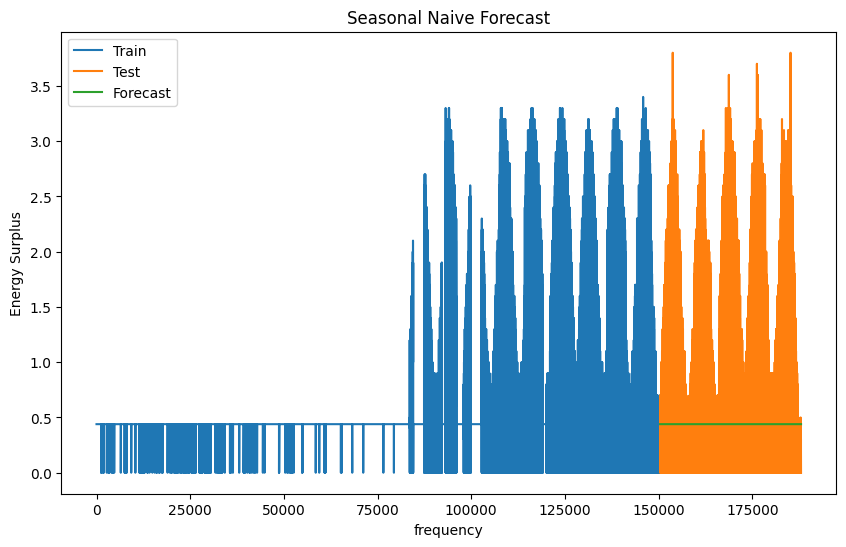

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data1' is your DataFrame with time series data
train_size = int(len(data1) * 0.8)
X, y = data1.iloc[:train_size], data1.iloc[train_size:]

# Seasonal Naive Forecasting
forecast = []
seasonality = 1  # Assuming monthly seasonality

for i in range(len(y)):
    forecast.append(X.iloc[i % seasonality]['solarenergy'])

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(X.index, X['solarenergy'], label='Train')
plt.plot(y.index, y['solarenergy'], label='Test')
plt.plot(y.index, forecast, label='Forecast')
plt.xlabel('frequency')
plt.ylabel('Energy Surplus')
plt.title('Seasonal Naive Forecast')
plt.legend()
plt.show()
